In [1]:
!ls *.geojson

arlington.geojson  bay.geojson	tiny.geojson  washington.geojson


In [2]:
import geopandas as gpd

In [3]:

df = gpd.read_file('tiny.geojson')

In [4]:
df

,geometry
0,"POLYGON ((-77.00412 38.88001, -76.98403 38.880..."


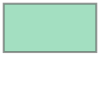

In [5]:
df.geometry[0]

In [6]:
df.geometry[0].bounds

(-77.00411796569824, 38.880009050525054, -76.98403358459473, 38.89049837983864)

In [7]:
from pyproj.crs import CRS

In [8]:
aea = CRS('+proj=aea +lat_1=29.5 +lat_2=42.5')

In [9]:
adf = df.to_crs(aea)

In [10]:
adf

,geometry
0,"POLYGON ((-5984395.950 6607800.422, -5983169.5..."


In [11]:
adf.bounds

,minx,miny,maxx,maxy
0,-5.984396e+06,6.606575e+06,-5.982342e+06,6.608629e+06


In [12]:
adf.bounds['maxx'][0]

-5982342.258777914

In [13]:
xdim = adf.bounds['maxx'][0] - adf.bounds['minx'][0]

In [14]:
xdim

2053.6916582481936

In [15]:
ydim = adf.bounds['maxy'][0] - adf.bounds['miny'][0]

In [16]:
ydim

2053.253422865644

In [17]:
size = xdim * ydim

In [18]:
size

4216749.426808724

In [19]:
scientific_notation="{:e}".format(size)

In [20]:
scientific_notation

'4.216749e+06'

In [21]:
! free -h

              total        used        free      shared  buff/cache   available
Mem:            15G        4.0G         10G        692K        473M         11G
Swap:            0B          0B          0B


In [22]:
from shapely.geometry import mapping

In [23]:
geom = mapping(adf.to_dict()['geometry'][0])
geom

{'type': 'Polygon',
 'coordinates': (((-5984395.950436162, 6607800.422162267),
   (-5983169.526643114, 6606575.348524178),
   (-5982342.258777914, 6607403.697694772),
   (-5983568.5129984645, 6608628.601947044),
   (-5984395.950436162, 6607800.422162267)),)}

In [24]:
tif_file = '/home/jovyan/bay/Baywide_13Class_20132014.tif'

In [25]:
import rioxarray
rds = rioxarray.open_rasterio(tif_file)

rds

<xarray.DataArray (band: 1, y: 878340, x: 499126)>
[438402330840 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 1.304e+06 1.304e+06 ... 1.803e+06 1.803e+06
  * y            (y) float64 2.535e+06 2.535e+06 ... 1.657e+06 1.657e+06
    spatial_ref  int64 0
Attributes:
    RepresentationType:      THEMATIC
    STATISTICS_COVARIANCES:  2.184897016039103
    STATISTICS_MAXIMUM:      12
    STATISTICS_MEAN:         3.587997581131
    STATISTICS_MINIMUM:      1
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       1.4781397146546
    _FillValue:              0.0
    scale_factor:            1.0
    add_offset:              0.0

# This blows up the jupyter kernel

In [26]:
#my_ds = rds.rio.clip([geom])

In [27]:
rds['x']

<xarray.DataArray 'x' (x: 499126)>
array([1303555.5, 1303556.5, 1303557.5, ..., 1802678.5, 1802679.5, 1802680.5])
Coordinates:
  * x            (x) float64 1.304e+06 1.304e+06 ... 1.803e+06 1.803e+06
    spatial_ref  int64 0

In [28]:
rds['y']

<xarray.DataArray 'y' (y: 878340)>
array([2535064.5, 2535063.5, 2535062.5, ..., 1656727.5, 1656726.5, 1656725.5])
Coordinates:
  * y            (y) float64 2.535e+06 2.535e+06 ... 1.657e+06 1.657e+06
    spatial_ref  int64 0

In [29]:
from pyproj import CRS
projection_string = (
'PROJCS["USA_Contiguous_Albers_Equal_Area_Conic_USGS_version",'
'GEOGCS["GCS_North_American_1983",DATUM["D_North_American_1983",'
'SPHEROID["GRS_1980",6378137.0,298.257222101]],'
'PRIMEM["Greenwich",0.0],'
'UNIT["Degree",0.0174532925199433]],'
'PROJECTION["Albers"],'
'PARAMETER["false_easting",0.0],'
'PARAMETER["false_northing",0.0],'
'PARAMETER["central_meridian",-96.0],'
'PARAMETER["standard_parallel_1",29.5],'
'PARAMETER["standard_parallel_2",45.5],'
'PARAMETER["latitude_of_origin",23.0],'
'UNIT["Meter",1.0],'
'VERTCS["NAVD_1988",'
'VDATUM["North_American_Vertical_Datum_1988"],'
'PARAMETER["Vertical_Shift",0.0],'
'PARAMETER["Direction",1.0],UNIT["Centimeter",0.01]]]')

proj = CRS(projection_string)
proj.to_string()




'ESRI:102039'

In [ ]:
'+proj=pipeline +step +proj=unitconvert +xy_in=deg +xy_out=rad +step +proj=aea +lat_0=23 +lon_0=-96 +lat_1=29.5 +lat_2=45.5 +x_0=0 +y_0=0 +ellps=GRS80'
>>> proj.to_string(4)
'+proj=aea +lat_0=23 +lon_0=-96 +lat_1=29.5 +lat_2=45.5 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs'
>>> proj.to_wkt()
'PROJCRS["USA_Contiguous_Albers_Equal_Area_Conic_USGS_version",BASEGEOGCRS["NAD83",DATUM["North American Datum 1983",ELLIPSOID["GRS 1980",6378137,298.257222101,LENGTHUNIT["metre",1]],ID["EPSG",6269]],PRIMEM["Greenwich",0,ANGLEUNIT["Degree",0.0174532925199433]]],CONVERSION["unnamed",METHOD["Albers Equal Area",ID["EPSG",9822]],PARAMETER["Latitude of false origin",23,ANGLEUNIT["Degree",0.0174532925199433],ID["EPSG",8821]],PARAMETER["Longitude of false origin",-96,ANGLEUNIT["Degree",0.0174532925199433],ID["EPSG",8822]],PARAMETER["Latitude of 1st standard parallel",29.5,ANGLEUNIT["Degree",0.0174532925199433],ID["EPSG",8823]],PARAMETER["Latitude of 2nd standard parallel",45.5,ANGLEUNIT["Degree",0.0174532925199433],ID["EPSG",8824]],PARAMETER["Easting at false origin",0,LENGTHUNIT["metre",1],ID["EPSG",8826]],PARAMETER["Northing at false origin",0,LENGTHUNIT["metre",1],ID["EPSG",8827]]],CS[Cartesian,2],AXIS["(E)",east,ORDER[1],LENGTHUNIT["metre",1,ID["EPSG",9001]]],AXIS["(N)",north,ORDER[2],LENGTHUNIT["metre",1,ID["EPSG",9001]]]]'
>>> proj.to_wkt("WKT1_GDAL")
'PROJCS["USA_Contiguous_Albers_Equal_Area_Conic_USGS_version",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'